In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import scipy.stats as sp

In [14]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [15]:
raw_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [19]:
# Making categorical variables for all the countries

cleaned_df = pd.concat([pd.get_dummies(raw_df['cntry']), raw_df.drop('cntry', 1)], 1)
cleaned_df.dropna(inplace=True)

In [20]:
ordinal_data = cleaned_df.drop(['CH','CZ','DE', 'ES', 'NO','SE', 'idno', 'gndr', 'agea', 'partner'], 1)
ordinal_2012 = ordinal_data.loc[ordinal_data['year']==6].drop('year', 1)
ordinal_2014 = ordinal_data.loc[ordinal_data['year']==7].drop('year', 1)

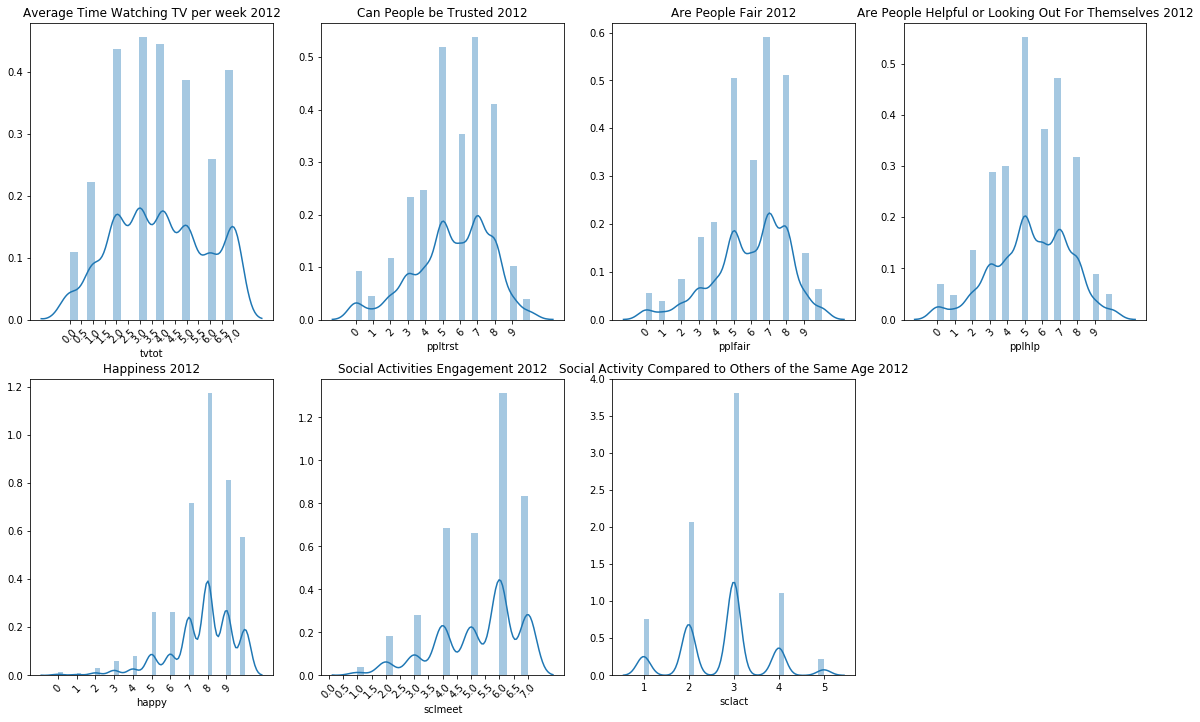

In [41]:
plt.figure(figsize=(20,12))
plt.subplot(241)
sns.distplot(ordinal_2012['tvtot'])
plt.xticks(np.arange(0,7.5,.5), rotation=45)
plt.title('Average Time Watching TV per week 2012')

plt.subplot(242)
sns.distplot(ordinal_2012['ppltrst'])
plt.xticks(np.arange(0,10,1), rotation=45)
plt.title('Can People be Trusted 2012')

plt.subplot(243)
sns.distplot(ordinal_2012['pplfair'])
plt.xticks(np.arange(0,10,1), rotation=45)
plt.title('Are People Fair 2012')

plt.subplot(244)
sns.distplot(ordinal_2012['pplhlp'])
plt.xticks(np.arange(0,10,1), rotation=45)
plt.title('Are People Helpful or Looking Out For Themselves 2012')

plt.subplot(245)
sns.distplot(ordinal_2012['happy'])
plt.xticks(np.arange(0,10,1), rotation=45)
plt.title('Happiness 2012')

plt.subplot(246)
sns.distplot(ordinal_2012['sclmeet'])
plt.xticks(np.arange(0,7.5,.5), rotation=45)
plt.title('Social Activities Engagement 2012')

plt.subplot(247)
sns.distplot(ordinal_2012['sclact'])
plt.title('Social Activity Compared to Others of the Same Age 2012')

plt.show()

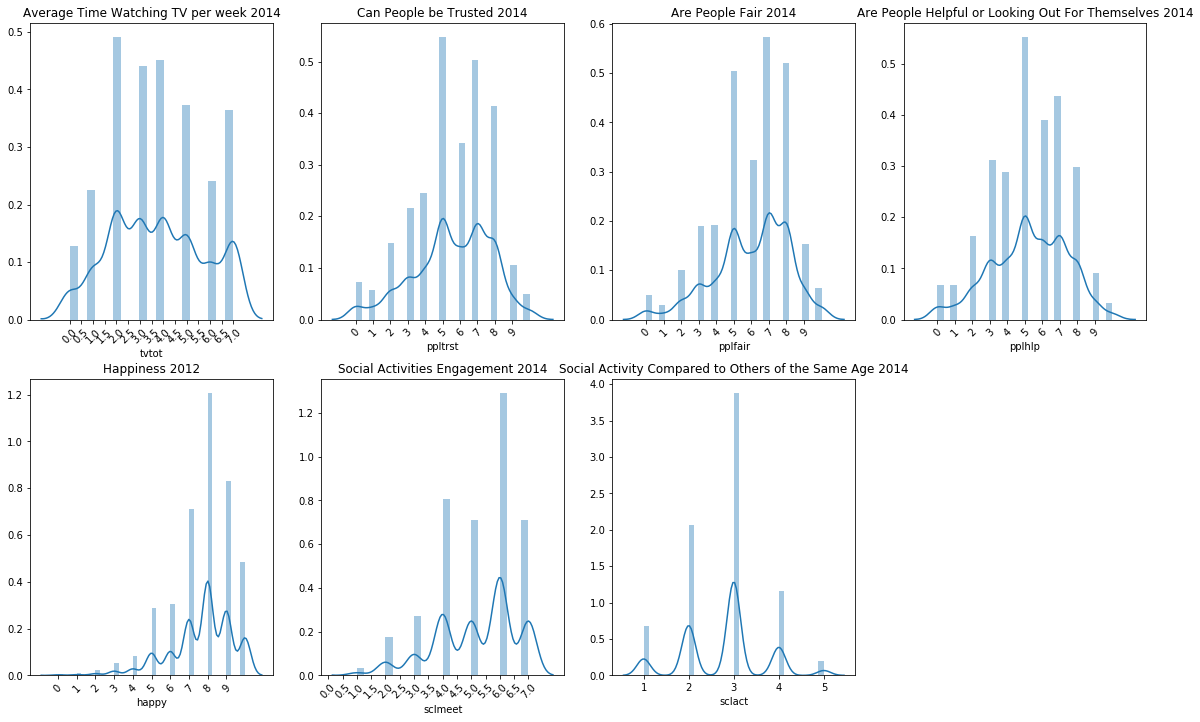

In [43]:
plt.figure(figsize=(20,12))
plt.subplot(241)
sns.distplot(ordinal_2014['tvtot'])
plt.xticks(np.arange(0,7.5,.5), rotation=45)
plt.title('Average Time Watching TV per week 2014')

plt.subplot(242)
sns.distplot(ordinal_2014['ppltrst'])
plt.xticks(np.arange(0,10,1), rotation=45)
plt.title('Can People be Trusted 2014')

plt.subplot(243)
sns.distplot(ordinal_2014['pplfair'])
plt.xticks(np.arange(0,10,1), rotation=45)
plt.title('Are People Fair 2014')

plt.subplot(244)
sns.distplot(ordinal_2014['pplhlp'])
plt.xticks(np.arange(0,10,1), rotation=45)
plt.title('Are People Helpful or Looking Out For Themselves 2014')

plt.subplot(245)
sns.distplot(ordinal_2014['happy'])
plt.xticks(np.arange(0,10,1), rotation=45)
plt.title('Happiness 2012')

plt.subplot(246)
sns.distplot(ordinal_2014['sclmeet'])
plt.xticks(np.arange(0,7.5,.5), rotation=45)
plt.title('Social Activities Engagement 2014')

plt.subplot(247)
sns.distplot(ordinal_2014['sclact'])
plt.title('Social Activity Compared to Others of the Same Age 2014')

plt.show()

__In 2012, Happiness and how often people engage in social activities seem to have a skewed distribution, meaning we have to use different tests__


__In 2014, Happiness, how often people engage in social activities seem to have a skewed distribution, and are people fair seem to have a skewed distribution__

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [45]:
raw_df['cntry'].value_counts()
# DE has a very low population and is at risk for falsely finding differences

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [52]:
t_ES, p_ES = sp.ttest_ind(cleaned_df.loc[(cleaned_df['ES']==1) & (cleaned_df['year']==6),'ppltrst'], 
                          cleaned_df.loc[(cleaned_df['ES']==1) & (cleaned_df['year']==7),'ppltrst']
                         )

print("Spain T score: ", t_ES)
print("Spain P score: ", p_ES)

t_SE, p_SE = sp.ttest_ind(cleaned_df.loc[(cleaned_df['SE']==1) & (cleaned_df['year']==6),'ppltrst'], 
                          cleaned_df.loc[(cleaned_df['SE']==1) & (cleaned_df['year']==7),'ppltrst']
                         )

print("\nSweden T score: ", t_SE)
print("Sweden P score: ", p_SE)

t_CH, p_CH = sp.ttest_ind(cleaned_df.loc[(cleaned_df['CH']==1) & (cleaned_df['year']==6),'ppltrst'], 
                          cleaned_df.loc[(cleaned_df['CH']==1) & (cleaned_df['year']==7),'ppltrst']
                         )

print("\nSwitzerland T score: ", t_CH)
print("Switzerland P score: ", p_CH)

t_NO, p_NO = sp.ttest_ind(cleaned_df.loc[(cleaned_df['NO']==1) & (cleaned_df['year']==6),'ppltrst'], 
                          cleaned_df.loc[(cleaned_df['NO']==1) & (cleaned_df['year']==7),'ppltrst']
                         )

print("\nNorway T score: ", t_NO)
print("Norway P score: ", p_NO)

t_CZ, p_CZ = sp.ttest_ind(cleaned_df.loc[(cleaned_df['CZ']==1) & (cleaned_df['year']==6),'ppltrst'], 
                          cleaned_df.loc[(cleaned_df['CZ']==1) & (cleaned_df['year']==7),'ppltrst']
                         )

print("\nCzech Republic T score: ", t_CZ)
print("Czech Republic P score: ", p_CZ)

t_DE, p_DE = sp.ttest_ind(cleaned_df.loc[(cleaned_df['DE']==1) & (cleaned_df['year']==6),'ppltrst'], 
                          cleaned_df.loc[(cleaned_df['DE']==1) & (cleaned_df['year']==7),'ppltrst']
                         )

print("\nGermany T score: ", t_DE)
print("Germany P score: ", p_DE)

Spain T score:  2.1000674443244907
Spain P score:  0.03583204193521363

Sweden T score:  -2.0268698056063146
Sweden P score:  0.0428293634522298

Switzerland T score:  -0.7156974792217816
Switzerland P score:  0.4742916002909491

Norway T score:  0.5119224181145228
Norway P score:  0.6087850218131978

Czech Republic T score:  0.34075433231518504
Czech Republic P score:  0.7333479315909976

Germany T score:  -0.3466213170125284
Germany P score:  0.7317764273785732


__For the countries of Switzerland, Norway, Czech Republic, and Germany, the p value is greater than .05, meaning that we can not reject the null hypothesis that people did not become less trusting from 2012 to 2014__

__Spain and Sweden had a p-score lower than .05, indicating that there is indeed a difference in whether the population feels that people are trustworthy from 2012 to 2014__

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [53]:
t_ES, p_ES = sp.kruskal(cleaned_df.loc[(cleaned_df['ES']==1) & (cleaned_df['year']==6),'happy'], 
                          cleaned_df.loc[(cleaned_df['ES']==1) & (cleaned_df['year']==7),'happy']
                         )

print("Spain T score: ", t_ES)
print("Spain P score: ", p_ES)

t_SE, p_SE = sp.kruskal(cleaned_df.loc[(cleaned_df['SE']==1) & (cleaned_df['year']==6),'happy'], 
                          cleaned_df.loc[(cleaned_df['SE']==1) & (cleaned_df['year']==7),'happy']
                         )

print("\nSweden T score: ", t_SE)
print("Sweden P score: ", p_SE)

t_CH, p_CH = sp.kruskal(cleaned_df.loc[(cleaned_df['CH']==1) & (cleaned_df['year']==6),'happy'], 
                          cleaned_df.loc[(cleaned_df['CH']==1) & (cleaned_df['year']==7),'happy']
                         )

print("\nSwitzerland T score: ", t_CH)
print("Switzerland P score: ", p_CH)

t_NO, p_NO = sp.kruskal(cleaned_df.loc[(cleaned_df['NO']==1) & (cleaned_df['year']==6),'happy'], 
                          cleaned_df.loc[(cleaned_df['NO']==1) & (cleaned_df['year']==7),'happy']
                         )

print("\nNorway T score: ", t_NO)
print("Norway P score: ", p_NO)

t_CZ, p_CZ = sp.kruskal(cleaned_df.loc[(cleaned_df['CZ']==1) & (cleaned_df['year']==6),'happy'], 
                          cleaned_df.loc[(cleaned_df['CZ']==1) & (cleaned_df['year']==7),'happy']
                         )

print("\nCzech Republic T score: ", t_CZ)
print("Czech Republic P score: ", p_CZ)

t_DE, p_DE = sp.kruskal(cleaned_df.loc[(cleaned_df['DE']==1) & (cleaned_df['year']==6),'happy'], 
                          cleaned_df.loc[(cleaned_df['DE']==1) & (cleaned_df['year']==7),'happy']
                         )

print("\nGermany T score: ", t_DE)
print("Germany P score: ", p_DE)

Spain T score:  2.9615793608595036
Spain P score:  0.08526461865591295

Sweden T score:  0.10011450993142058
Sweden P score:  0.7516922609168144

Switzerland T score:  0.7393607796289999
Switzerland P score:  0.3898657201494511

Norway T score:  17.78863118177249
Norway P score:  2.4685385809958533e-05

Czech Republic T score:  0.7888702806828175
Czech Republic P score:  0.37444194652901

Germany T score:  0.7954545454545382
Germany P score:  0.3724558699813717


__None of the countries have a p score lower than .05, therefore we can conclude that there was no significant difference in the happiness of people from those countries from 2012 to 2014 in this round of testing. Also, since the distribution of happiness in skewed in both years which makes it non-normal, we implement the kruskal test__

## Who reported watching more TV in 2012, men or women?

In [54]:
men_tv_df = cleaned_df.loc[cleaned_df['gndr']==1, 'tvtot']
female_tv_df = cleaned_df.loc[cleaned_df['gndr']==2, 'tvtot']

t_tv, p_tv = sp.ttest_ind(men_tv_df, female_tv_df)

print("T score: ", t_tv)
print('P score: ', p_tv)

T score:  -1.6176926106407103
P score:  0.10576758143732026


__The p score is greater than .05, indicating that there is no significant difference between the average time watching TV for males and females between all countries__

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

T score:  3.0751595802436618
P score:  0.002110868444877708

Couples mean:  6.062238180730102
Alone mean:  5.913848117421825


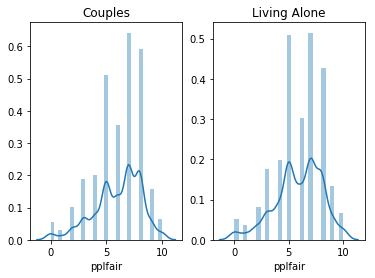

In [62]:
partner_df = cleaned_df.loc[cleaned_df['partner']==1, 'pplfair']
alone_df = cleaned_df.loc[cleaned_df['partner']==2, 'pplfair']

t_fair, p_fair = sp.ttest_ind(partner_df, alone_df)

print("T score: ", t_fair)
print('P score: ', p_fair)

plt.subplot(121)
sns.distplot(partner_df)
plt.title("Couples")

plt.subplot(122)
plt.title('Living Alone')
sns.distplot(alone_df)

print("\nCouples mean: ", partner_df.mean())
print("Alone mean: ", alone_df.mean())

__From this, we can conclude that there is a significant difference in the perception that people are fair for people living with a partner as compared to people who live alone.__

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

__Countries picked: Spain, Sweden, Norway, and Germany. Also, since the variable in question has a non-normal distribution, we use a non-normal test to check for differences such as the Kruskal test.__

In [66]:
spain = cleaned_df.loc[(cleaned_df['ES']==1) & (cleaned_df['year']==7),'sclmeet']
sweden = cleaned_df.loc[(cleaned_df['SE']==1) & (cleaned_df['year']==7),'sclmeet']
norway = cleaned_df.loc[(cleaned_df['NO']==1) & (cleaned_df['year']==7),'sclmeet']
germany = cleaned_df.loc[(cleaned_df['DE']==1) & (cleaned_df['year']==7),'sclmeet']

F_social, p_social = sp.kruskal(spain,
                                sweden,
                                norway,
                                germany
                                )

print("F score for social activities within countries: ", F_social)
print("p score for social activities within countries: ", p_social, "\n")

print(sp.ttest_ind(spain, sweden))
print(sp.ttest_ind(spain, norway))
print(sp.ttest_ind(spain, germany))
print(sp.ttest_ind(sweden, norway))
print(sp.ttest_ind(sweden, germany))
print(sp.ttest_ind(norway, germany))

F score for social activities within countries:  16.66410763507818
p score for social activities within countries:  0.000828527045724274 

Ttest_indResult(statistic=-2.6925202988475645, pvalue=0.0071506085242787525)
Ttest_indResult(statistic=-0.6968046493592841, pvalue=0.48601288469157433)
Ttest_indResult(statistic=2.168865565712128, pvalue=0.030298013218196748)
Ttest_indResult(statistic=1.8108243825311887, pvalue=0.07035826286442122)
Ttest_indResult(statistic=2.739042801007487, pvalue=0.006286550691196736)
Ttest_indResult(statistic=2.4461487954484564, pvalue=0.014676088277028506)


__From the Kruskal test, we see that the p-value is less than .05 so there is a significant difference in how often people meet for social activities between the countries.__

__From the t-tests in regards to Spain, we see that how often people engage in social activities differs significantly between Sweden and Germany. Spain seems to engage in lower social activities compared to sweden, but has more social activity compared to Germany as indicated by the F-scores.__

__Sweden also seems to differ significantly in social activity compared to Germany by having higher social activity__

__Finally, Norway alse seems to differ significantly in social activity compared to Germany by having a higher engagement in social activity.__

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

__The countries picked are the same as before, except this time the variable in question has a normal distribution, so we use a regular one-way ANOVA to test for differences, then run t-tests between the groups to see how the differences manifest themselves.__

In [69]:
spain = cleaned_df.loc[(cleaned_df['ES']==1) & (cleaned_df['year']==7),'sclact']
sweden = cleaned_df.loc[(cleaned_df['SE']==1) & (cleaned_df['year']==7),'sclact']
norway = cleaned_df.loc[(cleaned_df['NO']==1) & (cleaned_df['year']==7),'sclact']
germany = cleaned_df.loc[(cleaned_df['DE']==1) & (cleaned_df['year']==7),'sclact']

F_social_relative, p_social_relative = sp.f_oneway(spain,
                                sweden,
                                norway,
                                germany
                                )

print("F score for social activities within countries: ", F_social_relative)
print("p score for social activities within countries: ", p_social_relative, "\n")

F score for social activities within countries:  16.040230814503232
p score for social activities within countries:  2.455586027006786e-10 

Ttest_indResult(statistic=-6.012700644386077, pvalue=2.163487662927079e-09)
Ttest_indResult(statistic=-5.31751240602575, pvalue=1.1799291265139793e-07)
Ttest_indResult(statistic=-0.32503027389966244, pvalue=0.7452174850209412)
Ttest_indResult(statistic=0.42094459733257983, pvalue=0.6738528977365044)
Ttest_indResult(statistic=0.7120803198617717, pvalue=0.47660399113995766)
Ttest_indResult(statistic=0.6632621751899663, pvalue=0.5073737764824289)


__From the ANOVA test, we see that the p-value is greater than .05 so there is no significant difference in how often people meet for social activities _relative to age_ between the countries.__